# Python Standard Library Compression Evaluation

A quick and dirty evaluation of the gzip, zlib, and bz2 standard library compression facilities for suitability in text compression in moNNT.py.

In [1]:
import gzip, bz2, zlib
from timeit import Timer

from faker import Faker
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

fake = Faker("de_DE")
Faker.seed(0)
cm = 1 / 2.54

In [2]:
num_samples = 10
num_runs = 1000
ms = ["zlib", "gzip", "bz2"]
res = {"text_len": [], "text_size": [], "compr_ratio": [], "method": [], "time": []}
par_enc = bytes()

for sen in range(1,50):
    for _ in range(num_samples):
        par = fake.paragraph(nb_sentences=sen, variable_nb_sentences=True)
        len_par = len(par)
        par_enc = par.encode()
        len_par_enc = len(par_enc)
        for m in ms:
            s = zlib.compress(par_enc) if m == "zlib" else (gzip.compress(par_enc) if m == "gzip" else bz2.compress(par_enc))
            t = Timer(stmt=f"{m}.compress(par_enc)", setup=f"import {m}", globals=globals()).timeit(number=num_runs)
            res["text_len"].append(len_par)
            res["text_size"].append(len_par_enc)
            res["compr_ratio"].append(len(s) / len_par_enc)
            res["method"].append(m)
            res["time"].append(t)
            

In [3]:
df = pd.DataFrame.from_dict(res)

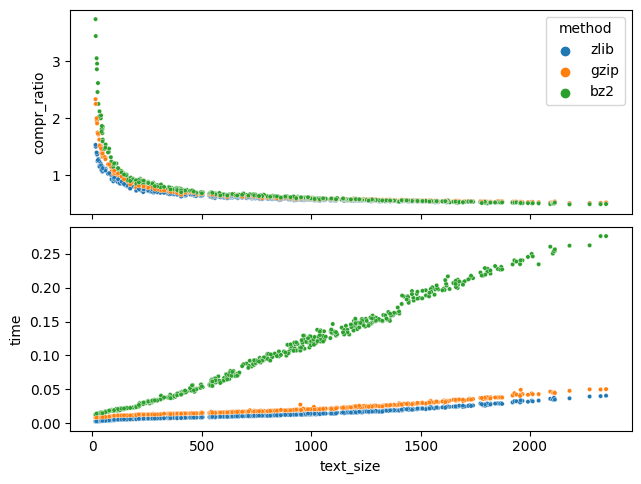

In [4]:
fig, ax = plt.subplots(2, 1, figsize=(16*cm, 2*6*cm), constrained_layout=True, sharex=True)
g1 = sns.scatterplot(data=df, hue="method", x="text_size", y="compr_ratio", ax=ax[0], s=10)
g2 = sns.scatterplot(data=df, hue="method", x="text_size", y="time", ax=ax[1], s=10)
g2.get_legend().remove()